<a href="https://colab.research.google.com/github/Alyssonfst/DesafioML-BAJA-SAE/blob/main/Manobrabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

base_dados = base_dados = pd.read_excel('anonymizedData.xlsx', sheet_name=3)
#base_dados

base_dados['Massa Total'] = base_dados['MV_Eixo dianteiro'] + base_dados['MV_Eixo Traseiro']
base_dados = base_dados.drop(['MV_Eixo dianteiro', 'MV_Eixo Traseiro'], axis=1)


colunas_para_excluir = [5, 7,10, 8, 11, 12, 14, 15, 16, 19, 20] + list(range(22, 46))  # Substitua pelos números dos índices das colunas a serem excluídas
base_dados = base_dados.drop(base_dados.columns[colunas_para_excluir], axis=1)


base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DP_Entre-Eixo                 752 non-null    float64
 1   DP_Bitola Dianteira           752 non-null    float64
 2   DP_Bitola Traseira            752 non-null    float64
 3   DP_Altura                     752 non-null    float64
 4   DP_Comprimento                752 non-null    float64
 5   DMV_Dianteira                 730 non-null    float64
 6   PCG_Y                         978 non-null    float64
 7   SD_Dimensoes dos pneus        1000 non-null   int64  
 8   ST_Curso Negativo de projeto  84 non-null     float64
 9   ST_Dimensoes dos pneus        1000 non-null   int64  
 10  D_Relacao                     556 non-null    float64
 11  P_Manobrabilidade             1000 non-null   int64  
 12  Massa Total                   730 non-null    float64
dtypes: f

In [ ]:



colunas_para_excluir = [8,7,9]  # Substitua pelos números dos índices das colunas a serem excluídas
base_dados = base_dados.drop(base_dados.columns[colunas_para_excluir], axis=1)


base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DP_Entre-Eixo        752 non-null    float64
 1   DP_Bitola Dianteira  752 non-null    float64
 2   DP_Bitola Traseira   752 non-null    float64
 3   DP_Altura            752 non-null    float64
 4   DP_Comprimento       752 non-null    float64
 5   DMV_Dianteira        730 non-null    float64
 6   PCG_Y                978 non-null    float64
 7   D_Relacao            556 non-null    float64
 8   P_Manobrabilidade    1000 non-null   int64  
 9   Massa Total          730 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 78.2 KB


In [ ]:
base_dados

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DMV_Dianteira,PCG_Y,D_Relacao,P_Manobrabilidade,Massa Total
0,1375.000000,1320.000000,1275.000000,1550.000000,2050.000000,0.417540,-4.000000,2.400000,1,164.811598
1,1437.352834,1301.084856,1257.383792,1526.436265,2065.013452,0.417531,-2.748294,2.790877,1,166.647718
2,1352.624255,1320.913741,1182.351714,1606.885444,2077.082448,0.415100,-0.668910,3.114094,1,173.521444
3,1307.150880,1511.199063,1282.562627,1611.635996,1982.262142,NaN,NaN,NaN,1,NaN
4,1393.831096,1408.554269,1398.255323,1554.642728,1946.073774,0.401552,3.543618,NaN,1,209.870900
...,...,...,...,...,...,...,...,...,...,...
995,1458.353300,1291.303150,1196.160187,1391.839336,1932.657829,0.388424,57.424283,2.731098,5,151.473674
996,1500.000000,1297.592843,1210.496743,1464.867874,2018.288445,0.410189,-33.938341,3.697063,5,166.849017
997,1514.746926,1261.565233,1191.948088,1533.951251,2021.909241,0.396369,-1.010591,4.274279,5,138.586663
998,1371.353579,1302.745066,1202.325865,1534.546076,1977.514112,0.434446,0.456156,NaN,5,166.347857


In [ ]:
colunas_para_verificar = ['DP_Entre-Eixo', 'DP_Bitola Dianteira', 'DP_Bitola Traseira', 'DP_Altura', 'DP_Comprimento', 'DMV_Dianteira']
base_dados = base_dados.dropna(subset=colunas_para_verificar, how='all')


In [ ]:
base_dados

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DMV_Dianteira,PCG_Y,D_Relacao,P_Manobrabilidade,Massa Total
0,1375.000000,1320.000000,1275.000000,1550.000000,2050.000000,0.417540,-4.000000,2.400000,1,164.811598
1,1437.352834,1301.084856,1257.383792,1526.436265,2065.013452,0.417531,-2.748294,2.790877,1,166.647718
2,1352.624255,1320.913741,1182.351714,1606.885444,2077.082448,0.415100,-0.668910,3.114094,1,173.521444
3,1307.150880,1511.199063,1282.562627,1611.635996,1982.262142,NaN,NaN,NaN,1,NaN
4,1393.831096,1408.554269,1398.255323,1554.642728,1946.073774,0.401552,3.543618,NaN,1,209.870900
...,...,...,...,...,...,...,...,...,...,...
993,1497.768383,1300.000000,1200.000000,691.051581,1865.908746,0.437770,16.586820,2.566194,5,181.894099
995,1458.353300,1291.303150,1196.160187,1391.839336,1932.657829,0.388424,57.424283,2.731098,5,151.473674
996,1500.000000,1297.592843,1210.496743,1464.867874,2018.288445,0.410189,-33.938341,3.697063,5,166.849017
997,1514.746926,1261.565233,1191.948088,1533.951251,2021.909241,0.396369,-1.010591,4.274279,5,138.586663


<Axes: xlabel='P_Manobrabilidade', ylabel='D_Relacao'>

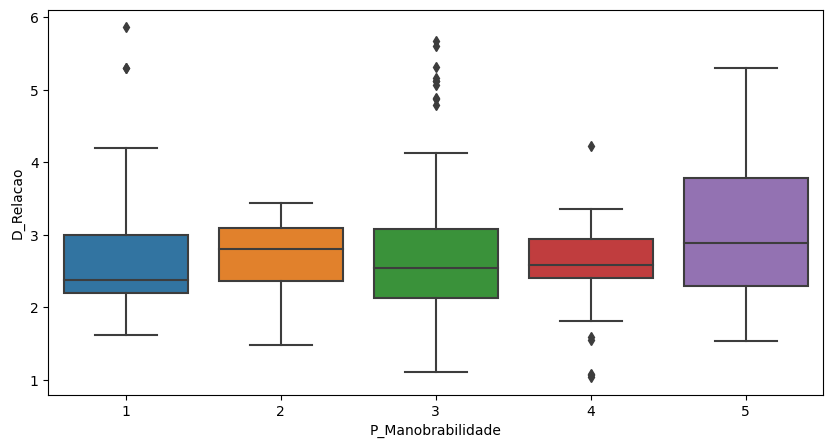

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Manobrabilidade', y='D_Relacao')

<Axes: xlabel='P_Manobrabilidade', ylabel='DP_Entre-Eixo'>

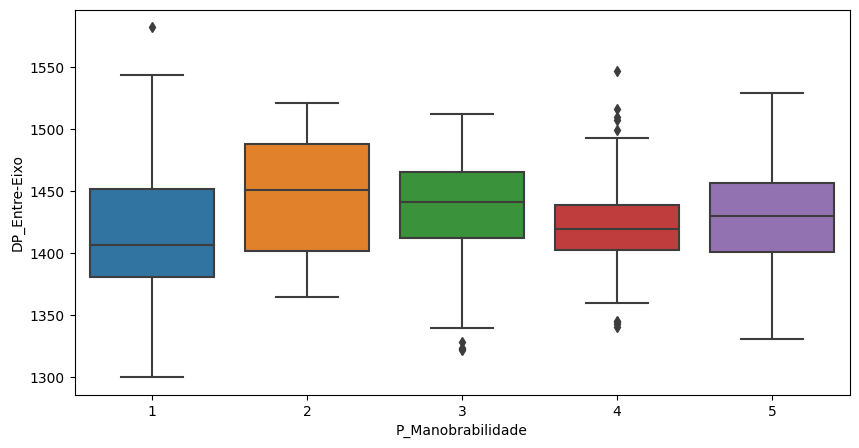

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=base_dados, x='P_Manobrabilidade', y='DP_Entre-Eixo')

In [ ]:
colunas_para_verificar = ['DMV_Dianteira', 'PCG_Y', 'D_Relacao']
base_dados = base_dados.dropna(subset=colunas_para_verificar, how='any')


In [ ]:
base_dados

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DMV_Dianteira,PCG_Y,D_Relacao,P_Manobrabilidade,Massa Total
0,1375.000000,1320.000000,1275.000000,1550.000000,2050.000000,0.417540,-4.000000,2.400000,1,164.811598
1,1437.352834,1301.084856,1257.383792,1526.436265,2065.013452,0.417531,-2.748294,2.790877,1,166.647718
2,1352.624255,1320.913741,1182.351714,1606.885444,2077.082448,0.415100,-0.668910,3.114094,1,173.521444
7,1390.000000,1250.000000,1180.945637,1535.568589,2000.805023,0.424409,22.024992,2.223738,1,186.649100
8,1379.224680,1304.783103,1194.439336,1550.000000,2025.170948,0.430060,6.269530,2.239527,1,185.161752
...,...,...,...,...,...,...,...,...,...,...
990,1420.001671,1218.019075,1199.625503,1585.505140,1976.224877,0.401641,0.006639,3.980815,5,153.024376
993,1497.768383,1300.000000,1200.000000,691.051581,1865.908746,0.437770,16.586820,2.566194,5,181.894099
995,1458.353300,1291.303150,1196.160187,1391.839336,1932.657829,0.388424,57.424283,2.731098,5,151.473674
996,1500.000000,1297.592843,1210.496743,1464.867874,2018.288445,0.410189,-33.938341,3.697063,5,166.849017


In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 997
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DP_Entre-Eixo        556 non-null    float64
 1   DP_Bitola Dianteira  556 non-null    float64
 2   DP_Bitola Traseira   556 non-null    float64
 3   DP_Altura            556 non-null    float64
 4   DP_Comprimento       556 non-null    float64
 5   DMV_Dianteira        556 non-null    float64
 6   PCG_Y                556 non-null    float64
 7   D_Relacao            556 non-null    float64
 8   P_Manobrabilidade    556 non-null    int64  
 9   Massa Total          556 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 47.8 KB


In [ ]:
import numpy as np

x_novos = np.array([1550,1310,1120,1450,1700,0.32,-26.41,0.06,188.9])
x_novos = x_novos.reshape(1, -1)

previsoes_novos_dados = modelo_rf.predict(x_novos)

print(previsoes_novos_dados)

[3]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train = np.array(base_dados.iloc[:, np.r_[0,1,2,3,4,5,6,7,9]])
y_train = np.array(base_dados['P_Manobrabilidade'])

#x_train
#y_train

x_train, x_val,y_train, y_val = train_test_split(x_train,y_train,train_size=0.7,random_state=37)

modelo_rf = RandomForestClassifier(n_estimators=250, max_depth=20, random_state=39)  # Ajuste os parâmetros conforme necessário

modelo_rf.fit(x_train, y_train)

predicoes = modelo_rf.predict(x_val)

acuracia = accuracy_score(y_val, predicoes)
print(f'Acurácia do modelo de Random Forest: {acuracia:.2f}')


Acurácia do modelo de Random Forest: 0.89


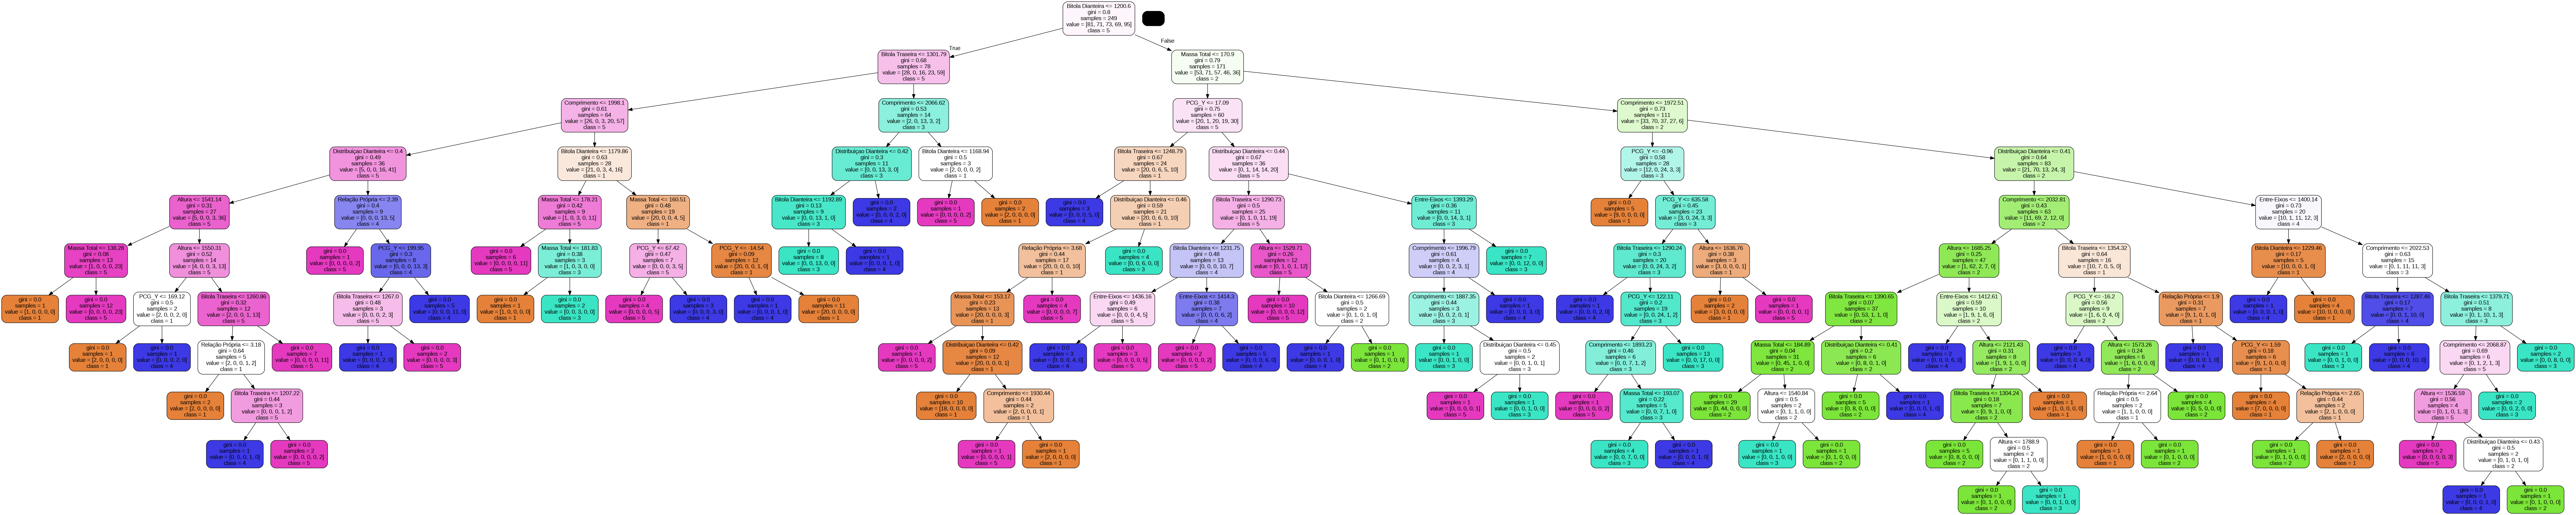

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Substitua o número do índice (0 neste caso) pelo número da árvore que deseja visualizar
estimator = modelo_rf.estimators_[0]

# Exporte a árvore para um arquivo .dot
export_graphviz(estimator, out_file='tree.dot',
                feature_names=['Entre-Eixos','Bitola Traseira', 'Bitola Dianteira','Altura','Comprimento','Distribuiçao Dianteira','PCG_Y',
                'Relação Própria','Massa Total'],  # Substitua pelos nomes das suas colunas
                class_names=['1', '2', '3', '4', '5'],  # Substitua pelas classes do seu modelo
                rounded=True, proportion=False,
                precision=2, filled=True)

# Converta o arquivo .dot para um formato legível
graph = pydotplus.graph_from_dot_file('tree.dot')

# Mostre a árvore
Image(graph.create_png())


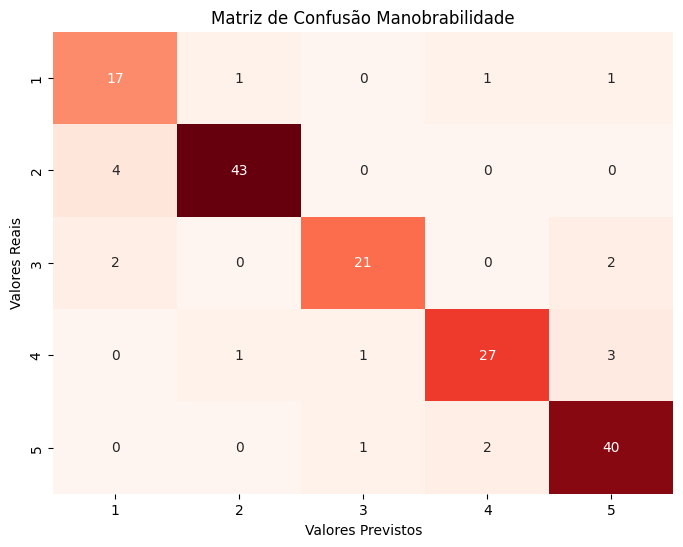

In [ ]:
from sklearn.metrics import confusion_matrix

# Criar a matriz de confusão
matriz_confusao = confusion_matrix(y_val, predicoes)

import matplotlib.pyplot as plt
import seaborn as sns

# Defina as classes reais e previstas
classes = ['1', '2', '3', '4', '5']

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, cmap='Reds', fmt='g', cbar=False, xticklabels=classes, yticklabels=classes)

plt.title('Matriz de Confusão Manobrabilidade')
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.show()


